## Project 04 - "Analysis of the Effect of Cord Clamping on Neonatal Survival Outcomes"

Load dependencies

In [21]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load in our dataset
cordClampingDF = pd.read_excel("Song_DCC_PlosOne_datadryad9.16.15.xlsx", sheet_name='Sheet1')

# Drop rows containing null values
# hct1224 and hct1236 have somewhat sparce data (NaN). Let's drop them.
cordClampingDF = cordClampingDF.drop(columns=['hct1224','hct1236'])
cordClampingDF = cordClampingDF.dropna()

# Display dataframe
cordClampingDF.head()

,Studyid,bw,ga,dcc,groups,sex,multiples,inoutborn,ans,ans48,...,polycythemia,died,anyivh,sevivh,los,anyrop,severerop,anynec,anycld,survwithoutmajormorbidity
0,1,1180,27.000000,1,1,2,0,1,0,0,...,1,0,1,0,0,1.0,0.0,0,0.0,1
1,2,2200,31.900000,1,1,2,0,1,1,1,...,0,0,0,0,0,0.0,0.0,0,0.0,1
2,3,800,28.900000,1,1,1,1,1,1,1,...,0,0,0,0,0,0.0,0.0,0,0.0,1
4,5,970,26.700001,1,1,2,0,1,1,1,...,0,0,1,0,0,1.0,0.0,0,0.0,1
5,6,1850,31.600000,1,1,1,1,1,1,0,...,0,0,0,0,0,0.0,0.0,0,0.0,1


In [5]:
print(f"cordClampingDF has {cordClampingDF.shape[0]} rows by {cordClampingDF.shape[1]} columns.")

cordClampingDF has 310 rows by 34 columns.


### Should 'died' or 'survwithoutmajormorbidity' be the target feature?

In [6]:
# [died] y = mx + b
print(cordClampingDF['died'].value_counts())
#print(f"Percent died: {round(cordClampingDF['died'].value_counts()[1]/cordClampingDF.shape[0]*100, 2)}.\n\n") # After removing rows with NaN values, there are no survivors!

# [survwithoutmajormorbidity]
print(cordClampingDF['survwithoutmajormorbidity'].value_counts())
print(f"Percent died: {round(cordClampingDF['survwithoutmajormorbidity'].value_counts()[0]/cordClampingDF.shape[0]*100, 2)}.")

died
0    310
Name: count, dtype: int64
survwithoutmajormorbidity
1    241
0     69
Name: count, dtype: int64
Percent died: 22.26.


## **Cleanup comparison**
### **Before dropping NaN subjects**:
#### since 'died' has a minority outcome of *less than 5%*, it would be better for 'survwithoutmajormorbidity' to be the feature column with a better target split of close to 75/25 ratio.

### **After dropping columns *'hct1224'* and *'hct1236'* then NaN rows**:
#### the 'died' column had no ramaining entries where a subject died (all survivors after ETL NaN cleanup); the 'survwithoutmajormorbidity' to be the feature column with a better target split of close to 4/1 ratio live-die ratio.

In [7]:
# Our target is the 'died', the features are everything else but the 'Studyid'
X = cordClampingDF.drop(columns=['Studyid','died','survwithoutmajormorbidity']).values
y = cordClampingDF['survwithoutmajormorbidity'].values

# Split our data into trainging and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Scale the data using StandardScaler
x_scaler = StandardScaler()

# Fit and transform the features
X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.fit_transform(X_test)

In [9]:
# Create  a Logistic Regression model
lr_model = LogisticRegression(random_state=1)

# Train the Logistic Regression model
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [10]:
# Make predictions on our data.
y_pred = lr_model.predict(X_test)

### **Evaluate the accuracy of the Logistic Regression model.**

In [11]:
# Generating a confusion matrix for our Logistic Regression model
confusion_matrix(y_test, y_pred)

array([[14,  3],
       [ 3, 58]])

In [12]:
from inspect import classify_class_attrs
# Generating classification report for our Logistic Regression model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        17
           1       0.95      0.95      0.95        61

    accuracy                           0.92        78
   macro avg       0.89      0.89      0.89        78
weighted avg       0.92      0.92      0.92        78



## **Our Logistic Regression model predicts both the 0 (survival without major morbidities) and the 1 (survival with major morbidities) very well.**
*   For the '0' outcome precision was 82% and the recall was 82%, too.
*   For the '1' outcome precision was 95% and the recall was 95%, too.




# Data Vizualization

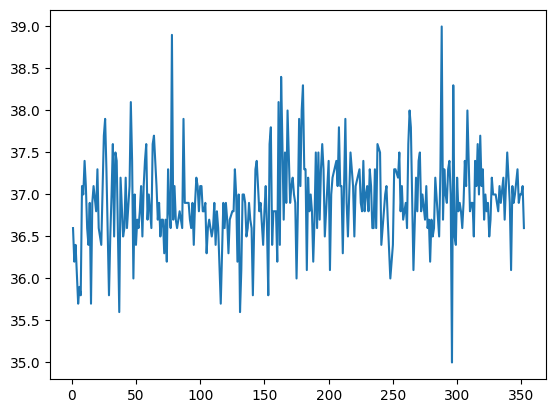

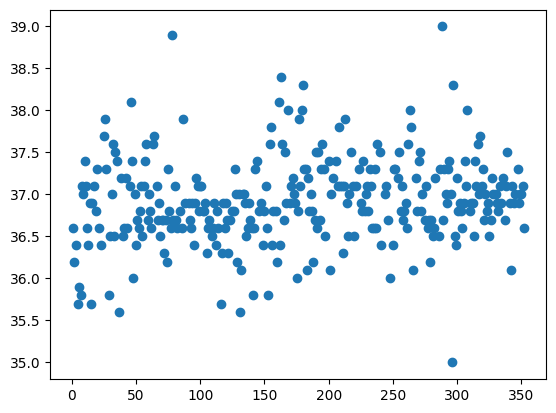

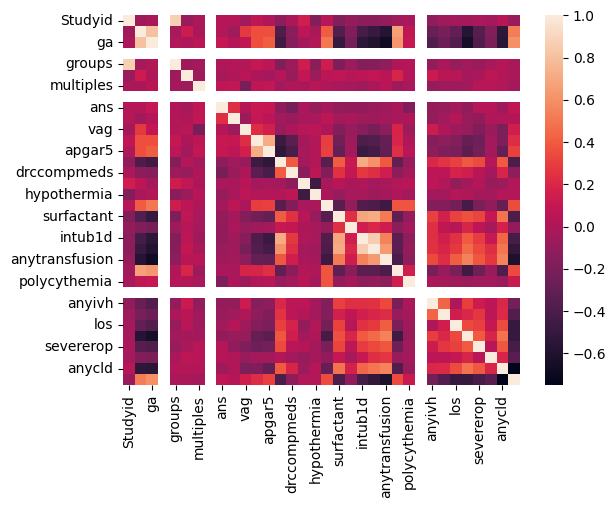

In [25]:
# plotting a line graph
plt.plot(cordClampingDF["Studyid"], cordClampingDF["atemp"])
plt.show()

# plotting a scatter plot
plt.scatter(cordClampingDF["Studyid"], cordClampingDF["atemp"])
plt.show()

# plotting a pie chart
#plt.pie(cordClampingDF["died"], labels=cordClampingDF["sex"])
#plt.show()

#plotting the heatmap for correlation
ax = sns.heatmap(cordClampingDF.corr())